**Iris Flowers**

Classification of iris flowers is perhaps the best-known example of machine learning. The aim is to classify iris flowers among three species (Setosa, Versicolor, or Virginica) from the sepals' and petals' length and width measurements. Here, we design a model that makes proper classifications for new flowers.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Loading the data
filepath = "/content/data.csv"
data = pd.read_csv(filepath, header = None)
data.columns = ['sepal_lenght','sepal_width','petal_length','petal_width','Category']
data.head()

,sepal_lenght,sepal_width,petal_length,petal_width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


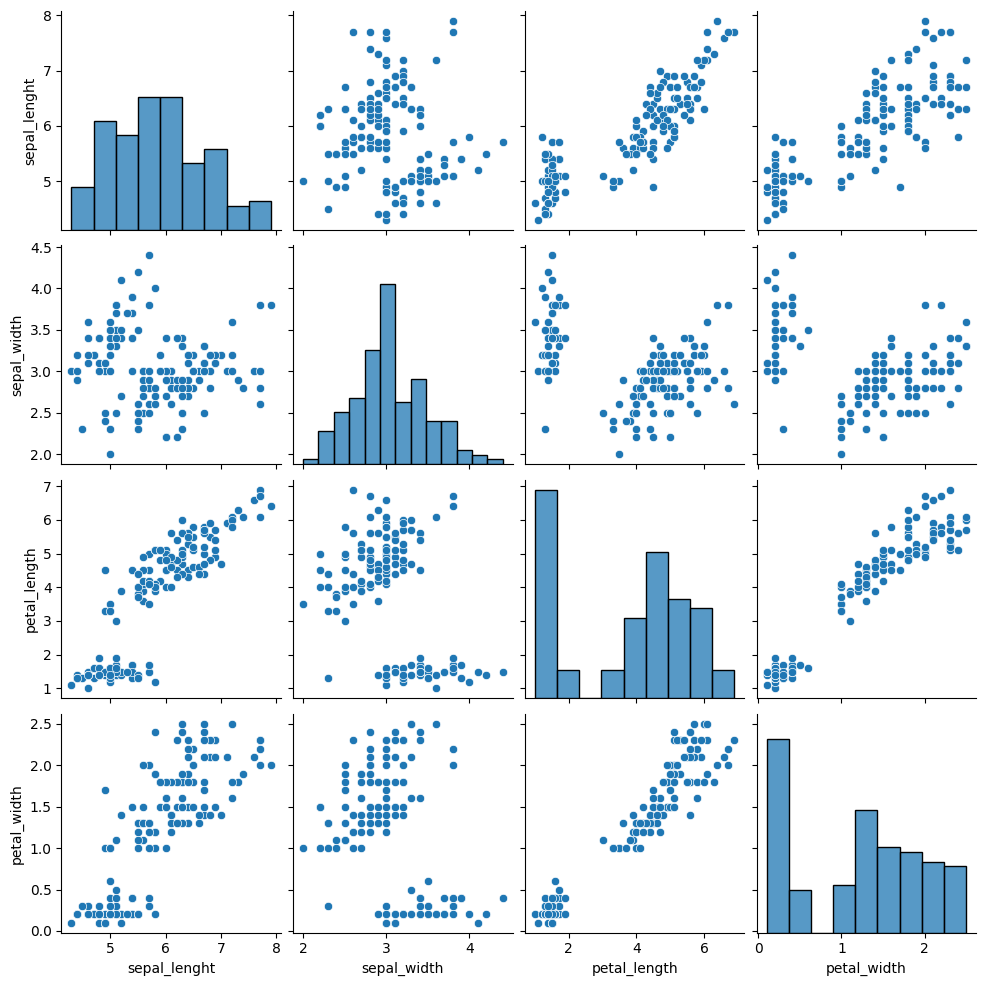

In [ ]:
sns.pairplot(data)

<ipython-input-49-3eb4b1474338>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


<Axes: >

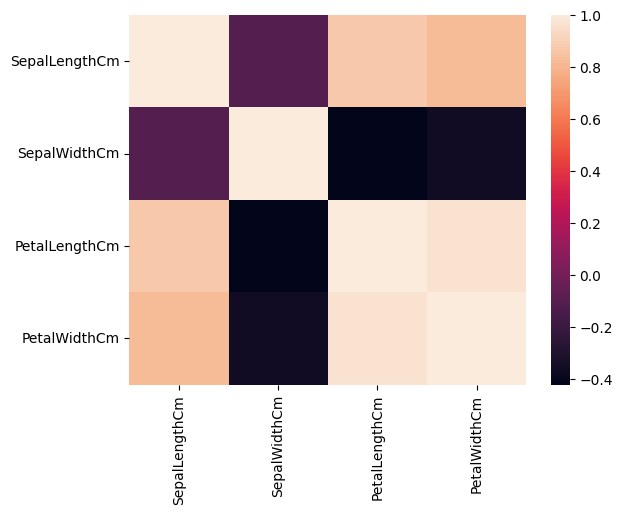

In [ ]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
x=data.iloc[:,:4]
y=data['Category']

**Splitting the data**
Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.

Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models -- such as machine learning -- are accurate.

In [ ]:
#Splitting dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

**Scalling the data**
Feature Scaling is a critical step in building accurate and effective machine learning models. One key aspect of feature engineering is scaling, normalization, and standardization, which involves transforming the data to make it more suitable for modeling. These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale. In this article, we will explore the concepts of scaling, normalization, and standardization, including why they are important and how to apply them to different types of data.

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)
y_pred_knn=knn3.predict(x_test)

In [76]:
#Calculating the accuracy
from sklearn import metrics
acc_knn=round(metrics.accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:",acc_knn)

Accuracy: 0.921


In [73]:
#finding the precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_knn, average='weighted')  # Use 'micro', 'macro', 'weighted', or 'samples' for multi-class problems
print("Precision:", precision)

Precision: 0.9323308270676692


In [74]:
#finding Recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_knn, average='weighted')  # Use 'micro', 'macro', 'weighted', or 'samples' for multi-class problems
print("Recall:", recall)


Recall: 0.9210526315789473


**KNN Classifier**

->KNN classifier operates by finding the k nearest neighbors to a given data point, and it takes the majority vote to classify the data point.

->The value of k is crucial, and one needs to choose it wisely to prevent overfitting or underfitting the model.

->One can use cross-validation to select the optimal value of k for the k-NN algorithm, which helps improve its performance and prevent overfitting or underfitting. Cross-validation is also used to identify the outliers before applying the KNN algorithm.

->The above article provides implementations of KNN in Python and R, and it compares the result with scikit-learn and the “Class” library in R.

In [ ]:
#Finding the optimum value of k
k_range=range(3,21)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    acc_knn=round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

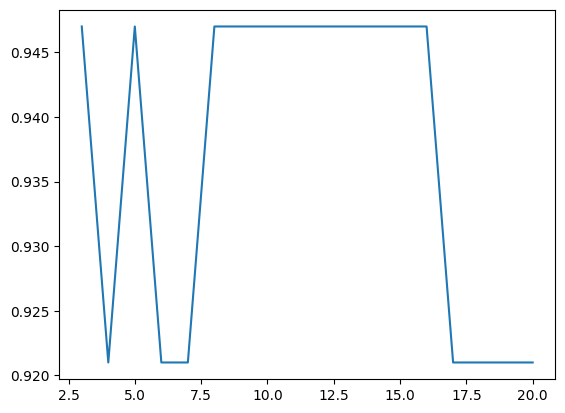

In [ ]:
#plotting accuracy vs k-value plot
plt.plot(k_range,scores)

In [ ]:
#Applying K Nearest Neighbor for k=6
from sklearn.neighbors import KNeighborsClassifier
knn6=KNeighborsClassifier(n_neighbors=6)
knn6.fit(x_train,y_train)
y_pred_knn=knn6.predict(x_test)

In [ ]:
#Calculating the accuracy
from sklearn import metrics
acc_knn=round(metrics.accuracy_score(y_test,y_pred_knn),3)
print('KNN Accuracy:'+ str(round(acc_knn,3)))

KNN Accuracy:0.921


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

In [ ]:
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[ 7  0  0]
 [ 0 18  0]
 [ 0  3 10]]
